# Overview

**Dataset**
labeled datasset collected from twitter

**Objective**
Classify tweets according to the arabic dialect in the text. <br>

## Import Libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

In [4]:
SEED = 42

## Load Dataset

In [5]:
# Check whether we're using google colab
using_colab = None
CWD = os.getcwd()
if os.path.exists('/content'):
  using_colab = True
else:
  using_colab = False
  PWD = os.path.dirname(CWD)

In [6]:
PWD

'/home/amgadoz/arabic-dialect-detection'

In [7]:
# Define the URL of the file to download
url = "https://github.com/AmgadHasan/arabic-dialect-detection/raw/main/data/arabic_dialects.csv"

# Define the local file path
data_folder_path = PWD + "/data/"
csv_file_path = data_folder_path +  "arabic_dialects.csv"
# Check if the file exists
if not os.path.isfile(csv_file_path):
    # If the file doesn't exist, download it from the URL
    print("Downloading file...")
    urllib.request.urlretrieve(url, csv_file_path)
    print("File downloaded.")
else:
    print("File exists.")

File exists.


In [8]:
pd.set_option('display.max_colwidth', 0)

In [9]:
PATH = csv_file_path
df = pd.read_csv(PATH, lineterminator='\n')
pd.set_option('display.max_colwidth', 0)
df.head()

,tweet,label
0,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو اختهم او قريبتهم تتعاكس تقولي عليهم من نشاط حقوق المرأة من ردة فعلهم.,LY
1,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ليا انا ميليشياوي زمان وتوة,LY
2,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ انها غير كل البنات وبيحس كأنه يعرفها من زمان. بعدين يتزوج وحدة منهن وممكن اثنين ولاثلاثة وتنقلب الرومانسية لعياط وشياط وتهزيب\nand they live happily ever after\nذي اند,LY
3,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا الانسان يلي يحتاج اهل يخاف منهم علشان يكون محترم هو انسان قليل الادب اصلاً. ثانياً شن ذنب يلي معندهش اب ولا ام ولا خوت ولا خوات؟ يعني اليتيمة متستحقش تتزوج؟ وثالثاً ليش البنت هي بس لازم ادير الف حساب للراجل؟ هي متستحقش يندارلها الف حساب ولا هي عبدة؟,LY
4,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ازوج بنت يتيمة ولا بنت معندهش خوت. هدي اعصابك وفكينا من التخلف امتاعك,LY


## EDA

### check NaNs

In [6]:
nans = df.isna().sum()
if nans.sum() == 0:
  print("nans:", nans.sum())
else:
  print(nans)

nans: 0


### check duplicates

In [7]:
duplicates_count = df.duplicated('tweet').sum()
print('duplicates_count:', duplicates_count)

duplicates_count: 0


### show samples of data texts to find out required preprocessing steps

In [8]:
df.head(50)

,tweet,label
0,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو اختهم او قريبتهم تتعاكس تقولي عليهم من نشاط حقوق المرأة من ردة فعلهم.,LY
1,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ليا انا ميليشياوي زمان وتوة,LY
2,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ انها غير كل البنات وبيحس كأنه يعرفها من زمان. بعدين يتزوج وحدة منهن وممكن اثنين ولاثلاثة وتنقلب الرومانسية لعياط وشياط وتهزيب\nand they live happily ever after\nذي اند,LY
3,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا الانسان يلي يحتاج اهل يخاف منهم علشان يكون محترم هو انسان قليل الادب اصلاً. ثانياً شن ذنب يلي معندهش اب ولا ام ولا خوت ولا خوات؟ يعني اليتيمة متستحقش تتزوج؟ وثالثاً ليش البنت هي بس لازم ادير الف حساب للراجل؟ هي متستحقش يندارلها الف حساب ولا هي عبدة؟,LY
4,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ازوج بنت يتيمة ولا بنت معندهش خوت. هدي اعصابك وفكينا من التخلف امتاعك,LY
5,@alibobkr63 او حتى من اي دين او طائفة. اسف ممكن الغلط غلطتي بس مكنش قصدي,LY
6,@muhamed01111 باهي نستنوه. بلكي مشغول ولا حاجة,LY
7,@muhamed01111 مهما اختلفنا راه نحنا خوت. والله ما عندي عدا على واحد. انا فرحان نقدر انروح لحوشنا وفرحان للناس الاخرى الفرحانة. ربي يفرجها عليك وعلينا كلنا,LY
8,@muhamed01111 بالنسبة ليا انا والله شبعت هم ونكد وقتل ودم والحقد. الله يهدينا جميعا,LY
9,@Ajo32asLibya @Jed_ly مو نحنا الحياة عندنا مية في مية ومعندش شي اندكوا راسنا فيه الا لبس الشورتات.\nتخلف,LY


#### Checking non-Arabic characters

In [9]:
df.loc[50]['tweet']

'@Candam1Sami يومك مبارك خوي سامي، في هالدنيا يا حاج'

#### Looking for URLS

In [10]:
URL_REGEX = r'\b(?:https?|ftp)://[-a-zA-Z0-9+&@#/%?=~_|!:,.;]*[-a-zA-Z0-9+&@#/%=~_|]'
url_counts = df['tweet'].str.contains(URL_REGEX, regex=True).sum()
if url_counts:
  print('url_counts', url_counts.sum())
else:
  print('No URLs found')

url_counts 24398


- 1 user handles (@user)
- 2 hashtags (#hashtag)
- 3 Non english characters

### check dataset balancing

<Axes: xlabel='label'>

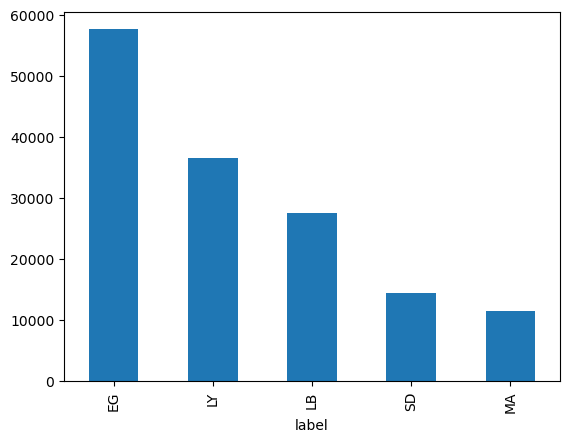

In [11]:
df['label'].value_counts().plot.bar()

<font color='darkOrange'>Highly unbalanced; higehst ratio=5.7/1</font>


- Cleaning and Preprocessing are:
    - 1 <font color='darkOrange'>Remove hashes (#) in hashtags</font>
    - 2 <font color='darkOrange'>Remove user mentions (@user)</font>
    - 3 <font color='darkOrange'>Remove urls (@user)</font>
    - 3 <font color='darkOrange'>Remove non-Arabic characters (emojis)</font>
    - 4 <font color='darkOrange'>Remove punctuation </font>

# Cleaning and Preprocessing

## Detailed Steps

### 1 Remove hashes

In [12]:
df['tweet'] = df['tweet'].str.replace("#", '')

### 2 Remove user mentions

In [13]:
USER_REGEX = r'(?:@\w+)'
df['tweet'] = df['tweet'].str.replace(USER_REGEX, '',regex=True)

### 3 Removing non Arabic characters

In [14]:
NON_ARABIC_REGEX = r'[^\u0621-\u064A ]+' # r'[^\u0600-\u06FF\s]+'
df['tweet'] = df['tweet'].str.replace(NON_ARABIC_REGEX, '', regex=True)

In [15]:
df['tweet'] 

0           قليلين ادب ومنافقين لو اختهم او قريبتهم تتعاكس تقولي عليهم من نشاط حقوق المرأة من ردة فعلهم                                                                                                                                                                               
1           الليبيين متقلبينبس بالنسبة ليا انا ميليشياوي زمان وتوة                                                                                                                                                                                                                    
2           كل  تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ انها غير كل البنات وبيحس كأنه يعرفها من زمان بعدين يتزوج وحدة منهن وممكن اثنين ولاثلاثة وتنقلب الرومانسية لعياط وشياط وتهزيب     ذي اند                                                                                      
3           رانيا عقليتك متخلفة اولا الانسان يلي يحتاج اهل يخاف منهم علشان يكون محترم هو انسان قليل الادب اصلا ثانيا شن ذنب يلي معندهش اب ولا ام ولا خوت ولا خوات ي

### 4 COMMENTED OUT Remove stopwords

In [16]:
# STOPWORDS_REGEX = r'\b(?:{})\b'.format('|'.join(STOPWORDS))
# df['tweet'] = df['tweet'].str.replace(STOPWORDS_REGEX, '', regex=True)
# df['tweet'] = df['tweet'].str.replace(r'\s+', ' ', regex=True) #Remove extra spaces

### 6 Final Check

In [17]:
df.head(20)

,tweet,label
0,قليلين ادب ومنافقين لو اختهم او قريبتهم تتعاكس تقولي عليهم من نشاط حقوق المرأة من ردة فعلهم,LY
1,الليبيين متقلبينبس بالنسبة ليا انا ميليشياوي زمان وتوة,LY
2,كل تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ انها غير كل البنات وبيحس كأنه يعرفها من زمان بعدين يتزوج وحدة منهن وممكن اثنين ولاثلاثة وتنقلب الرومانسية لعياط وشياط وتهزيب ذي اند,LY
3,رانيا عقليتك متخلفة اولا الانسان يلي يحتاج اهل يخاف منهم علشان يكون محترم هو انسان قليل الادب اصلا ثانيا شن ذنب يلي معندهش اب ولا ام ولا خوت ولا خوات يعني اليتيمة متستحقش تتزوج وثالثا ليش البنت هي بس لازم ادير الف حساب للراجل هي متستحقش يندارلها الف حساب ولا هي عبدة,LY
4,شكلك متعقدة علشان الراجل لي تحبيه ازوج بنت يتيمة ولا بنت معندهش خوت هدي اعصابك وفكينا من التخلف امتاعك,LY
5,او حتى من اي دين او طائفة اسف ممكن الغلط غلطتي بس مكنش قصدي,LY
6,باهي نستنوه بلكي مشغول ولا حاجة,LY
7,مهما اختلفنا راه نحنا خوت والله ما عندي عدا على واحد انا فرحان نقدر انروح لحوشنا وفرحان للناس الاخرى الفرحانة ربي يفرجها عليك وعلينا كلنا,LY
8,بالنسبة ليا انا والله شبعت هم ونكد وقتل ودم والحقد الله يهدينا جميعا,LY
9,مو نحنا الحياة عندنا مية في مية ومعندش شي اندكوا راسنا فيه الا لبس الشورتاتتخلف,LY


## Transformer Class

In production, the input to the model will be a list of strings. 
We need to create a sklearn transformer that carries out all these steps when given a list of strings.

In [18]:
# class TextPreprocessor(BaseEstimator, TransformerMixin):
#     def __init__(self, language='Arabic'):
#         self.language = language
    
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X, y=None):
#         # 1. Remove hashtags
#         X = [re.sub(r'#\S+', '', text) for text in X]
        
#         # 2. Remove user mentions
#         X = [re.sub(r'@\S+', '', text) for text in X]

#         # 3. Remove URLs
#         X = [re.sub(r'http\S+', '', text) for text in X]
        
#         # 4. Remove non-Arabic characters
#         if self.language == 'Arabic':
#           X = [re.sub(r'[^\u0600-\u06FF]+', ' ', text) for text in X]
        
#         return X

In [19]:
df.tweet.head(50).values

array(['  قليلين ادب ومنافقين لو اختهم او قريبتهم تتعاكس تقولي عليهم من نشاط حقوق المرأة من ردة فعلهم',
       '  الليبيين متقلبينبس بالنسبة ليا انا ميليشياوي زمان وتوة',
       '  كل  تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ انها غير كل البنات وبيحس كأنه يعرفها من زمان بعدين يتزوج وحدة منهن وممكن اثنين ولاثلاثة وتنقلب الرومانسية لعياط وشياط وتهزيب     ذي اند',
       '  رانيا عقليتك متخلفة اولا الانسان يلي يحتاج اهل يخاف منهم علشان يكون محترم هو انسان قليل الادب اصلا ثانيا شن ذنب يلي معندهش اب ولا ام ولا خوت ولا خوات يعني اليتيمة متستحقش تتزوج وثالثا ليش البنت هي بس لازم ادير الف حساب للراجل هي متستحقش يندارلها الف حساب ولا هي عبدة',
       ' شكلك متعقدة علشان الراجل لي تحبيه ازوج بنت يتيمة ولا بنت معندهش خوت هدي اعصابك وفكينا من التخلف امتاعك',
       ' او حتى من اي دين او طائفة اسف ممكن الغلط غلطتي بس مكنش قصدي',
       ' باهي نستنوه بلكي مشغول ولا حاجة',
       ' مهما اختلفنا راه نحنا خوت والله ما عندي عدا على واحد انا فرحان نقدر انروح لحوشنا وفرحان للناس الاخرى الفرحانة ربي يفرجها

# Extracting test set

In [20]:
df_train, df_test = train_test_split(df, stratify=df.label, test_size=0.1)

In [21]:
df_test.shape

(14773, 2)

In [22]:
df_train.shape

(132952, 2)

In [23]:
df_test.head(3)

,tweet,label
98030,أهو برده تكون طراوة,EG
147312,والعايز الحرب منو نحن فترنا حروب والجماعه عندهم حرب مدوره حاليا ما قادرين يحسموها السودان عنده ورقة ضغط حاسمه يقدر يستفيد منها لاسترجاع حلايب وشلاتين,SD
1685,شكرا ربي يحفطك عليوه,LY


In [24]:
df_train.head(3)

,tweet,label
13062,انتي جافية والا الغلا ماتبيسؤالموسيقي,LY
121897,باركوا لجوجو اجاها عريس,LB
16758,لابأس عليك يالزينه ان شاء الله هذا حد السو,LY


# Saving the preprocessed dataset

In [8]:
train_csv_file_path = data_folder_path + "arabic_dialects_train.csv"
test_csv_file_path = data_folder_path + "arabic_dialects_test.csv"

In [9]:
train_csv_file_path

'/home/amgadoz/arabic-dialect-detection/data/arabic_dialects_train.csv'

In [26]:
df_train.to_csv(train_csv_file_path, index=False)

In [27]:
df_test.to_csv(test_csv_file_path, index=False)

In [28]:
df_train = pd.read_csv(train_csv_file_path)
df_train

,tweet,label
0,انتي جافية والا الغلا ماتبيسؤالموسيقي,LY
1,باركوا لجوجو اجاها عريس,LB
2,لابأس عليك يالزينه ان شاء الله هذا حد السو,LY
3,الزن ده هو اكتر حاجة مدمرة للسلام النفسي واحنا بصراحة سلامنا النفسي اهم من كل شيء الحياة قصيرة ومش مستحملة حوارات كتير,EG
4,الكوت كلها ناس بتدور ع علاقات تانيه بس تكون احلي م اللي لسه خالصه اول انبارح,EG
...,...,...
132947,بتعالج امشي عم طريق البر لمصر ولا تونس أوفر وعطيهن لمستشفيات ليبية خير بيعطوك مسكنات برا ولا جوا,LY
132948,هيثم الحريقي اللي مش عاجبه حاجة ومعترض على طولبيدافع عن الأزهر ياترى ليه,EG
132949,وانتي طيبة ي احلى لارا يا ملكة تويتر يارب انا وانتي حبيبتي الله يسعدك,LB
132950,خير ان شاء الله يا حبي,EG
